In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

### Shape of data

In [3]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [4]:
y_train_valid -= 769
y_test -= 769

In [5]:
perm = np.random.permutation(X_train_valid.shape[0])
numTrain = int(0.8*X_train_valid.shape[0])
numVal = X_train_valid.shape[0] - numTrain
Xtrain = X_train_valid[perm[0:numTrain]]
ytrain = y_train_valid[perm[0:numTrain]]
Xval = X_train_valid[perm[numTrain: ]]
yval = y_train_valid[perm[numTrain: ]]

In [6]:
Xtrain.shape

(1692, 22, 1000)

In [7]:
import keras
from keras import backend as K
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, ELU
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Input, LSTM, RepeatVector, Lambda,Bidirectional,CuDNNLSTM
from keras import regularizers
from keras.preprocessing.sequence import TimeseriesGenerator
from keras import objectives
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.regularizers import l2
from keras import layers, models

Using TensorFlow backend.


In [8]:
hidden_dim = 20

In [9]:
input_shape=(22, 1000)
model = models.Sequential()
model.add(layers.Permute((2, 1), input_shape=input_shape))
model.add(Bidirectional(LSTM(256, recurrent_dropout=0.25, kernel_regularizer=regularizers.l2(0.01), input_shape=input_shape, return_sequences=True)))
model.add(BatchNormalization())

#model.add(Bidirectional(LSTM(256, recurrent_dropout=0.25, kernel_regularizer=regularizers.l2(0.01), input_shape=input_shape, return_sequences=True)))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128,activation='elu'))
model.add(Dropout(0.5))
model.add(layers.SimpleRNN(hidden_dim))
model.add(layers.Dense(4, activation='softmax'))
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_1 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1000, 512)         571392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000, 512)         2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 512)         0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000, 128)         65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000, 128)         0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)               

Train on 1692 samples, validate on 423 samples
Epoch 1/30
1692/1692 [==============================] - 163s 96ms/step - loss: 2.4988 - acc: 0.2447 - val_loss: 2.2945 - val_acc: 0.2435
Epoch 2/30
1692/1692 [==============================] - 161s 95ms/step - loss: 2.2719 - acc: 0.2606 - val_loss: 2.1373 - val_acc: 0.2742
Epoch 3/30
1692/1692 [==============================] - 163s 97ms/step - loss: 2.1213 - acc: 0.2766 - val_loss: 2.0460 - val_acc: 0.2553
Epoch 4/30
1692/1692 [==============================] - 165s 98ms/step - loss: 2.0269 - acc: 0.2689 - val_loss: 1.9707 - val_acc: 0.2671
Epoch 5/30
1692/1692 [==============================] - 168s 99ms/step - loss: 1.9390 - acc: 0.2884 - val_loss: 1.9141 - val_acc: 0.2482
Epoch 6/30
1692/1692 [==============================] - 167s 98ms/step - loss: 1.8695 - acc: 0.2914 - val_loss: 1.8697 - val_acc: 0.2600
Epoch 7/30
1692/1692 [==============================] - 166s 98ms/step - loss: 1.8202 - acc: 0.2819 - val_loss: 1.8043 - val_acc: 0

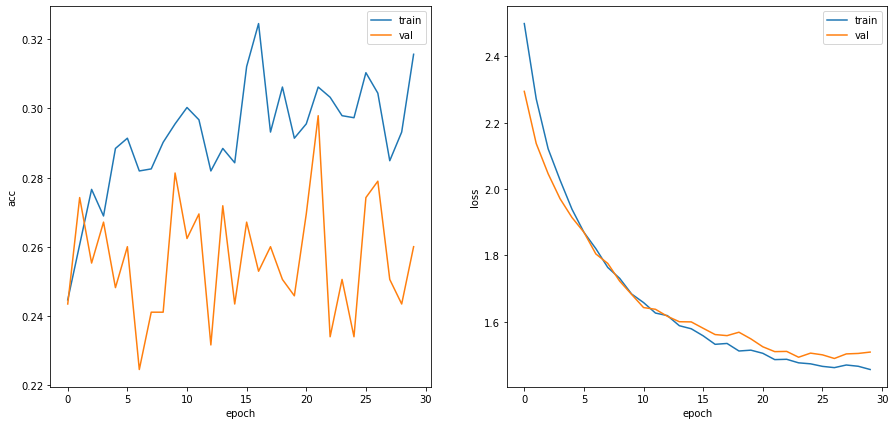

In [11]:
loss_hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), epochs=30)
type(loss_hist)
hist = loss_hist.history
list(hist)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])